In [3]:
from engine import Value
from nn import Neuron, Layer, MLP
from make_graph import get_nodes_in_graph, make_graph

In [4]:
Value(2.0)

Value(Data=2.0)

In [5]:
xs = [
    [-1.0, 3.0, 2.0],
    [2.0, -3.0, -1.0],
    [1.0, -1.0, 3.0],
    [-3.0, 2.0, 2.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

In [6]:
n = MLP(3, [4, 4, 1])

In [7]:
y_pred = [n(x) for x in xs]

In [8]:
y_pred

[Value(Data=0.2649072310215462),
 Value(Data=-0.33043262344314234),
 Value(Data=-0.16412142004943595),
 Value(Data=0.5362703166552063)]

In [9]:
loss = sum(((y_p - y_act)**2 for y_p, y_act in zip(y_pred, ys)))

In [10]:
loss

Value(Data=1.9024200703888776)

In [11]:
loss.backward()

In [12]:
n.layers

In [13]:
n.layers[0].neurons[0].w

[Value(Data=0.7367735273027736),
 Value(Data=-0.7957100430000332),
 Value(Data=0.15110307283257174)]

In [14]:
n.layers[0].neurons[0].w[0].grad

-0.024510000687309283

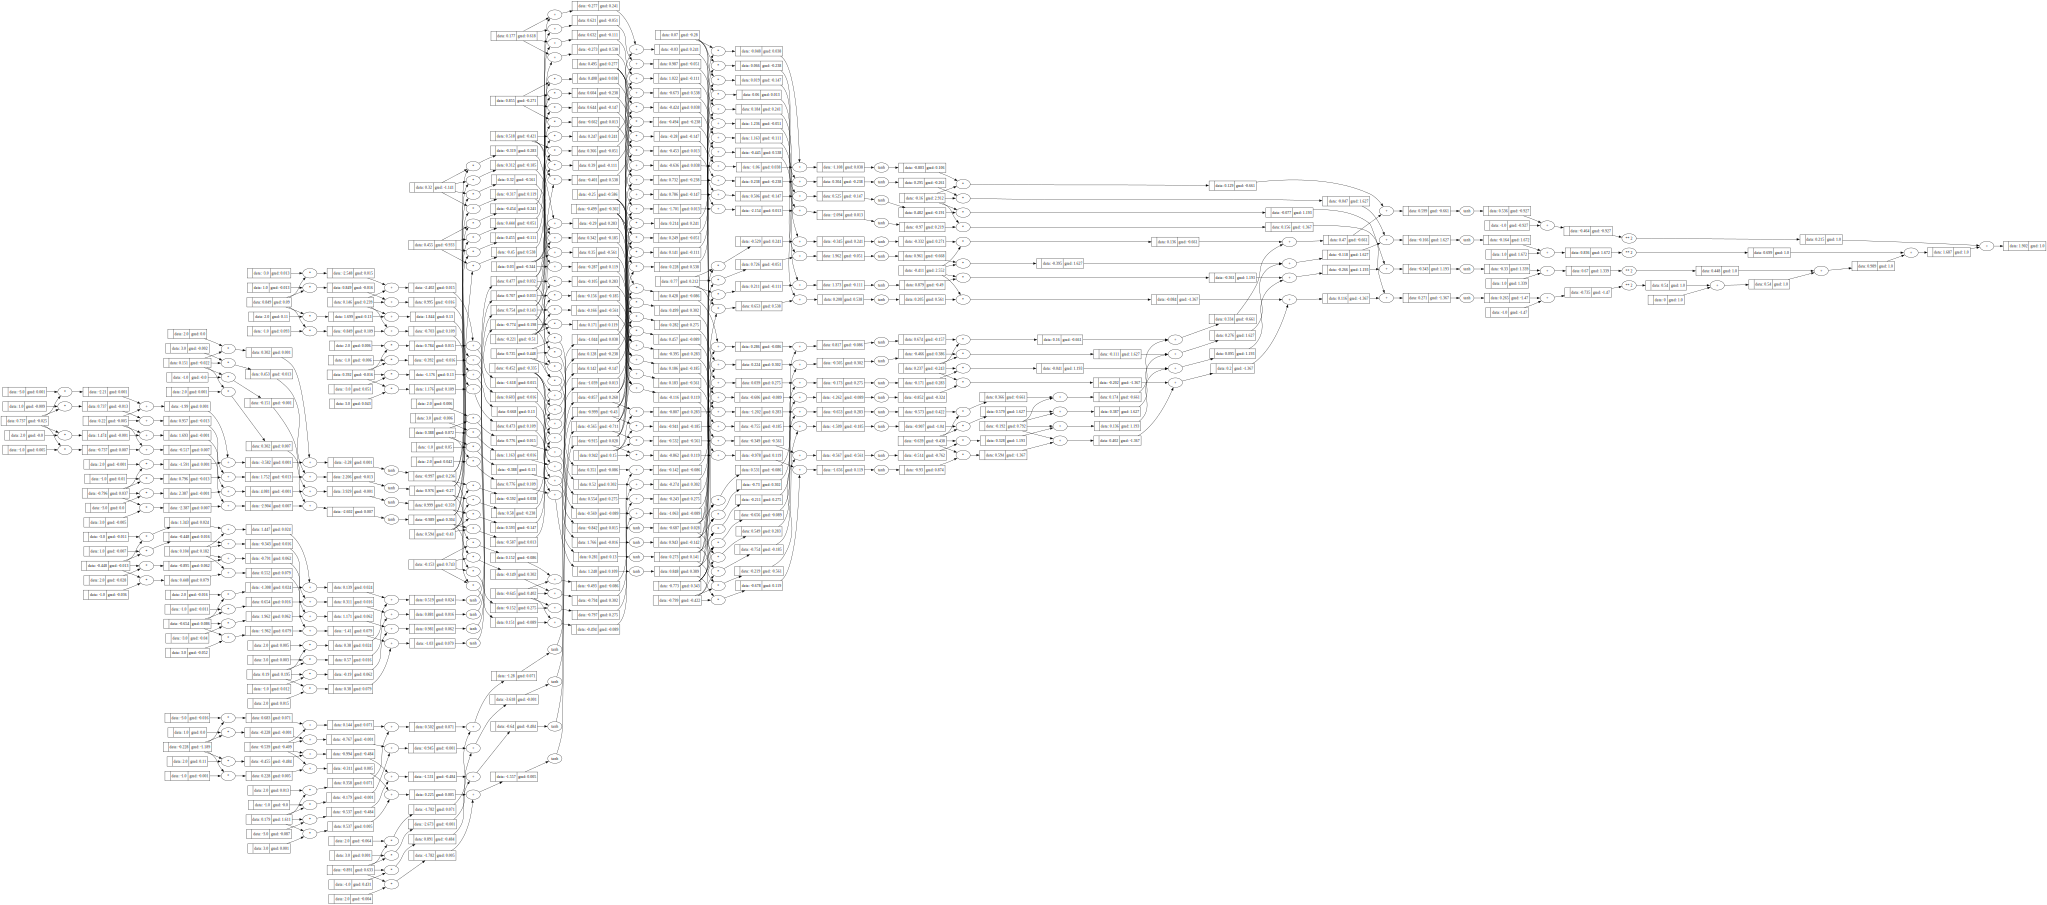

In [15]:
make_graph(get_nodes_in_graph(loss))

#### make a simple neuron

In [77]:
from typing import List

In [96]:
def forward(neuron: Neuron, inp: List[Value]) -> Value:
    return neuron(inp)

In [107]:
def calc_loss(preds: List[Value], actuals: List[Value]) -> Value:
    sum_squares = sum((y_pred - y_gt)**2 for (y_pred, y_gt) in zip(preds, actuals))
    mse = sum_squares / len(preds)
    return mse

In [108]:
def update_params(n: Neuron, lr: float):
    params = n.w + [n.b]
    for p in params:
        p.data -= lr * p.grad

In [112]:
xs = [
    [Value(2.0), Value(1.0), Value(3.0)],
    [Value(2.0), Value(2.0), Value(2.0)],
    [Value(-2.0), Value(5.0), Value(0.0)]
]
ys = [1.0, -1.0, 1.0]
n = Neuron(3)
print(n.w, n.b)

[Value(Data=-0.025670438851895128), Value(Data=-0.3435161950501677), Value(Data=-0.15617820896406243)] Value(Data=-0.6148657739637724)


In [113]:
for i in range(50):
    y_pred = []
    for x in xs:
        pred = forward(n, x)
        y_pred.append(pred)
    loss = calc_loss(y_pred, ys)
    print("I: ", i, "LOSS: ", loss)
    loss.backward()
    update_params(n, 0.0001)

I:  0 LOSS:  Value(Data=2.512293601515445)
I:  1 LOSS:  Value(Data=2.5121987956313596)
I:  2 LOSS:  Value(Data=2.5120089662624623)
I:  3 LOSS:  Value(Data=2.511723677263182)
I:  4 LOSS:  Value(Data=2.511342272049138)
I:  5 LOSS:  Value(Data=2.5108638707418995)
I:  6 LOSS:  Value(Data=2.510287366335201)
I:  7 LOSS:  Value(Data=2.5096114198594845)
I:  8 LOSS:  Value(Data=2.508834454515613)
I:  9 LOSS:  Value(Data=2.5079546487424906)
I:  10 LOSS:  Value(Data=2.5069699281769786)
I:  11 LOSS:  Value(Data=2.5058779564580385)
I:  12 LOSS:  Value(Data=2.504676124820354)
I:  13 LOSS:  Value(Data=2.503361540415789)
I:  14 LOSS:  Value(Data=2.501931013293974)
I:  15 LOSS:  Value(Data=2.500381041966061)
I:  16 LOSS:  Value(Data=2.498707797468257)
I:  17 LOSS:  Value(Data=2.4969071058342402)
I:  18 LOSS:  Value(Data=2.494974428878015)
I:  19 LOSS:  Value(Data=2.492904843181258)
I:  20 LOSS:  Value(Data=2.4906930171719734)
I:  21 LOSS:  Value(Data=2.48833318617436)
I:  22 LOSS:  Value(Data=2.4858191

In [114]:
n.w

[Value(Data=0.02723218322402534),
 Value(Data=-0.2728586543214959),
 Value(Data=-0.05304620051732288)]

#### make a simple MLP of 2 layers

In [138]:
# 3 inputs, 2 layers of 2 neurons and 1 neuron respectively
mlp1 = MLP(3, [2, 1])

In [154]:
xs = [
    [Value(2.0), Value(1.0), Value(3.0)],
    [Value(2.0), Value(2.0), Value(2.0)],
    [Value(-2.0), Value(5.0), Value(0.0)]
]
ys = [1.0, -1.0, 1.0]

In [156]:
for i in range(50):
    y_preds = []
    for x in xs:
        pred = mlp1(x)
        y_preds.append(pred)
    loss = sum((y_pred - y_gt)**2 for (y_pred, y_gt) in zip(y_preds, ys)) / (len(y_preds))
    print("LOSS: ", loss)

    # zero_grad()
    for l in mlp1.layers:
        for n in l.neurons:
            params = n.w + [n.b]
            for p in params:
                p.grad = 0.0
    
    loss.backward()
    # update weights
    for l in mlp1.layers:
        for n in l.neurons:
            params = n.w + [n.b]
            for p in params:
                p.data -= 5.05 * p.grad

LOSS:  Value(Data=4.004401027416498e-05)
LOSS:  Value(Data=3.993214269662385e-05)
LOSS:  Value(Data=3.982088845787984e-05)
LOSS:  Value(Data=3.971024255022052e-05)
LOSS:  Value(Data=3.960020002016332e-05)
LOSS:  Value(Data=3.949075596772634e-05)
LOSS:  Value(Data=3.93819055457078e-05)
LOSS:  Value(Data=3.9273643958979106e-05)
LOSS:  Value(Data=3.916596646378598e-05)
LOSS:  Value(Data=3.9058868367067676e-05)
LOSS:  Value(Data=3.8952345025775924e-05)
LOSS:  Value(Data=3.884639184622139e-05)
LOSS:  Value(Data=3.8741004283412425e-05)
LOSS:  Value(Data=3.8636177840412536e-05)
LOSS:  Value(Data=3.853190806771458e-05)
LOSS:  Value(Data=3.842819056261192e-05)
LOSS:  Value(Data=3.8325020968587526e-05)
LOSS:  Value(Data=3.8222394974710166e-05)
LOSS:  Value(Data=3.812030831504272e-05)
LOSS:  Value(Data=3.80187567680557e-05)
LOSS:  Value(Data=3.791773615605291e-05)
LOSS:  Value(Data=3.7817242344601696e-05)
LOSS:  Value(Data=3.7717271241979484e-05)
LOSS:  Value(Data=3.761781879862477e-05)
LOSS:  Va